In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("diabetes.csv")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0또는 1)

In [11]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### get_clf_eval(), precision_recall_curve_plot() 다시 불러오기

In [17]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = round(accuracy_score(y_test, pred), 4)
    precision = round(precision_score(y_test, pred), 4)
    recall = round(recall_score(y_test, pred), 4)
    f1 = round(f1_score(y_test, pred), 4)
    roc_auc = round(roc_auc_score(y_test, pred_proba), 4)
    
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}, F1: {f1}, AUC: {roc_auc} ")

In [20]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[0: threshold_boundary], label="recall")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()

### Logistic Regression으로 학습 및 예측 수행

In [18]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083 


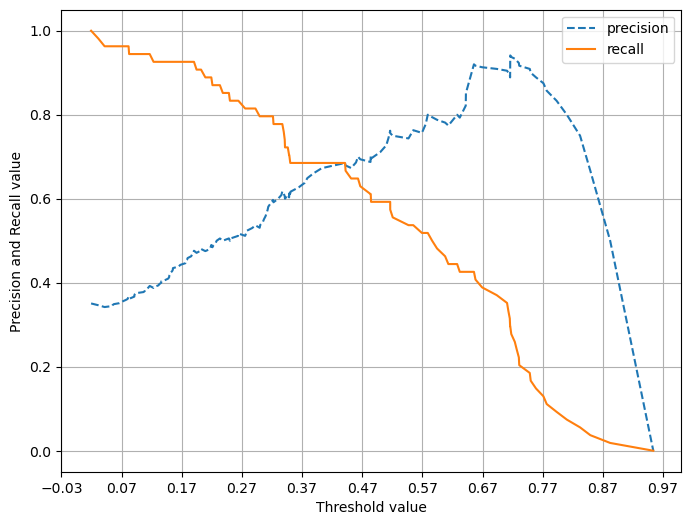

In [21]:
# precision recall curve 그림
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [23]:
# 각 피처들의 사분위 분포 확인
diabetes_data.describe()

# 0이 되면 안되는 피처들이 0인 경우들이 보임

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


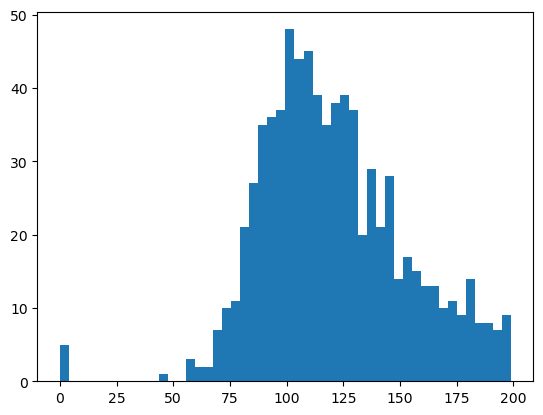

In [27]:
plt.hist(diabetes_data['Glucose'], bins=50)
plt.show()

In [34]:
# 0값이 있는 피처들을 살펴보자
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 loop를 돌며 데이터 값이 0인 레코드 수를 추출
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f"{feature} 0 건수는 {zero_count}, 퍼센트는 {round(zero_count/total_count*100, 2)}%")

Glucose 0 건수는 0, 퍼센트는 0.0%
BloodPressure 0 건수는 0, 퍼센트는 0.0%
SkinThickness 0 건수는 0, 퍼센트는 0.0%
Insulin 0 건수는 0, 퍼센트는 0.0%
BMI 0 건수는 0, 퍼센트는 0.0%


In [33]:
# 0값을 평균 값으로 대체
# zero_features 리스트에 저장된 피처에 대해 0값을 평균값으로 대체
# 잘못된 코드 = 0의 값까지 모두 평균을 구하는데 사용해버림
# diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())
# 제대로 된 코드 = 0인 값들은 제외하고 0이 아닌 값들의 평균을 구해서 그걸로 0을 대체함
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[diabetes_data[zero_features] != 0][zero_features].mean())

### 스케일링, 학습, 예측, 성능측정

In [35]:
# StandardScaler 클래스를 이용해 피처 데이터 세트에 스케일링 적용 & 학습 및 예측
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱회귀로 학습 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.75, 재현율: 0.6111, F1: 0.6735, AUC: 0.8498 


### 분류결정 임곗값을 변경하면서 성능 측정

In [38]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\n임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [39]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임곗값: 0.3
오차 행렬
[[68 32]
 [ 9 45]]
정확도: 0.7338, 정밀도: 0.5844, 재현율: 0.8333, F1: 0.687, AUC: 0.8498 

임곗값: 0.33
오차 행렬
[[73 27]
 [11 43]]
정확도: 0.7532, 정밀도: 0.6143, 재현율: 0.7963, F1: 0.6935, AUC: 0.8498 

임곗값: 0.36
오차 행렬
[[75 25]
 [13 41]]
정확도: 0.7532, 정밀도: 0.6212, 재현율: 0.7593, F1: 0.6833, AUC: 0.8498 

임곗값: 0.39
오차 행렬
[[82 18]
 [15 39]]
정확도: 0.7857, 정밀도: 0.6842, 재현율: 0.7222, F1: 0.7027, AUC: 0.8498 

임곗값: 0.42
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8498 

임곗값: 0.45
오차 행렬
[[86 14]
 [19 35]]
정확도: 0.7857, 정밀도: 0.7143, 재현율: 0.6481, F1: 0.6796, AUC: 0.8498 

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8498 

임곗값: 0.5
오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.75, 재현율: 0.6111, F1: 0.6735, AUC: 0.8498 


In [40]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8498 
